In [1]:
# utilize numpy to solve problems
import numpy as np

# 3-a-Checking point 1, 2) Use atomic units, where ℏ = 1 and m = 1.
hbar = 1.0  # Reduced Planck's constant in atomic units
m = 1.0     # Mass of the particle in atomic units
L = 1.0     # Width of the infinite potential well in Bohr radii (a0)

# 3-a-Checking point 3) Discretize the space using a real-space grid of 2000 points from −L/2 to L/2.
N = 2000                            # Number of grid points
x = np.linspace(-L / 2, L / 2, N)   # Discretized real-space grid from -L/2 to L/2
dx = x[1] - x[0]                    # Spatial step size

# Print the first few values to check
print(f"Grid points (x) from -L/2 to L/2 with N={N}:")
print(x[:5], '...', x[-5:])  # Displaying the first and last few points
print(f"Spatial step size (dx): {dx}")

Grid points (x) from -L/2 to L/2 with N=2000:
[-0.5        -0.49949975 -0.4989995  -0.49849925 -0.497999  ] ... [0.497999   0.49849925 0.4989995  0.49949975 0.5       ]
Spatial step size (dx): 0.0005002501250625513


In [2]:
# 3-b-Checking point 1) The second derivative can be approximated using a finite difference method
def construct_laplacian(N, dx):
    """
    Construct the Laplacian matrix using finite difference method.
    
    parameters
    : N: Number of points in the discretized grid.
    : dx: Spacing between adjacent points on the grid.
    :return: Laplacian matrix of size N x N.
    """
    # Coefficient for the Laplacian matrix
    coefficient = 1 / (dx ** 2)
    
    # Main diagonal with -2
    main_diag = -2 * np.ones(N)
    
    # Off-diagonal with 1
    off_diag = np.ones(N - 1)
    
    # 3-b-Checking point 2) Write a Python function that constructs this Laplacian matrix using NumPy.
    laplacian = coefficient * (np.diag(main_diag) + np.diag(off_diag, k=1) + np.diag(off_diag, k=-1))
    
    return laplacian

# Construct the Laplacian matrix
laplacian_matrix = construct_laplacian(N, dx)

# Print the constructed Laplacian matrix 
print("Constructed Laplacian Matrix:")
print(laplacian_matrix)
# size of Laplacian Matrix, 2000 X 2000
print("Size of the Laplacian Matrix:", laplacian_matrix.shape)

Constructed Laplacian Matrix:
[[-7992001.99999936  3996000.99999968        0.         ...
         0.                0.                0.        ]
 [ 3996000.99999968 -7992001.99999936  3996000.99999968 ...
         0.                0.                0.        ]
 [       0.          3996000.99999968 -7992001.99999936 ...
         0.                0.                0.        ]
 ...
 [       0.                0.                0.         ...
  -7992001.99999936  3996000.99999968        0.        ]
 [       0.                0.                0.         ...
   3996000.99999968 -7992001.99999936  3996000.99999968]
 [       0.                0.                0.         ...
         0.          3996000.99999968 -7992001.99999936]]
Size of the Laplacian Matrix: (2000, 2000)


In [3]:
# 3-c-Checking point 1) construct the Hamiltonian operator
def construct_hamiltonian(laplacian):
    """
    Construct the Hamiltonian matrix from the Laplacian matrix in atomic units.
    
    :parameter
    :laplacian: The Laplacian matrix.
    :return: Hamiltonian matrix.
    """
    # # 3-c-Checking point 2) Calculate this Hamiltonian matrix
    hamiltonian = -0.5 * laplacian
    return hamiltonian

# Construct the Hamiltonian matrix
hamiltonian_matrix = construct_hamiltonian(laplacian_matrix)

# print the calculated Hamiltonian matrix
print("Constructed Hamiltonian Matrix:")
print(hamiltonian_matrix)
# size of hamiltonian Matrix, 2000 X 2000
print("Size of the hamiltonian Matrix:", hamiltonian_matrix.shape)

Constructed Hamiltonian Matrix:
[[ 3996000.99999968 -1998000.49999984       -0.         ...
        -0.               -0.               -0.        ]
 [-1998000.49999984  3996000.99999968 -1998000.49999984 ...
        -0.               -0.               -0.        ]
 [      -0.         -1998000.49999984  3996000.99999968 ...
        -0.               -0.               -0.        ]
 ...
 [      -0.               -0.               -0.         ...
   3996000.99999968 -1998000.49999984       -0.        ]
 [      -0.               -0.               -0.         ...
  -1998000.49999984  3996000.99999968 -1998000.49999984]
 [      -0.               -0.               -0.         ...
        -0.         -1998000.49999984  3996000.99999968]]
Size of the hamiltonian Matrix: (2000, 2000)


In [4]:
# 3-d-Checking point 1) Use NumPy’s linear algebra package (np.linalg.eig) to compute the eigenvalues (energy levels) and eigenfunctions of the Hamiltonian
def solve_eigenvalues_and_eigenfunctions(hamiltonian):
    """
    Solve for the eigenvalues and eigenfunctions of the Hamiltonian matrix.
    
    parameter
    : hamiltonian: The Hamiltonian matrix.
    : return: Sorted eigenvalues and corresponding eigenfunctions.
    """
    # Compute eigenvalues and eigenvectors of the Hamiltonian
    eigenvalues, eigenfunctions = np.linalg.eig(hamiltonian)
    
    # 3-d-Checking point 2) Sort the eigenvalues and corresponding eigenfunctions in increasing order
    sorted_indices = np.argsort(eigenvalues)
    sorted_eigenvalues = eigenvalues[sorted_indices]
    sorted_eigenfunctions = eigenfunctions[:, sorted_indices]
    
    # 3-d-Checking point 2) Extract the first seven energy levels
    first_seven_energies = sorted_eigenvalues[:7]
    
    return first_seven_energies, sorted_eigenfunctions

# Solve for eigenvalues and eigenfunctions
first_seven_energies, eigenfunctions = solve_eigenvalues_and_eigenfunctions(hamiltonian_matrix)

# Print the first seven energy levels
print("First seven energy levels (in atomic units):")
for i, energy in enumerate(first_seven_energies, start=1):
    print(f"Energy level {i}: {energy:.2f} a.u.")

First seven energy levels (in atomic units):
Energy level 1: 4.92 a.u.
Energy level 2: 19.70 a.u.
Energy level 3: 44.32 a.u.
Energy level 4: 78.80 a.u.
Energy level 5: 123.12 a.u.
Energy level 6: 177.30 a.u.
Energy level 7: 241.32 a.u.


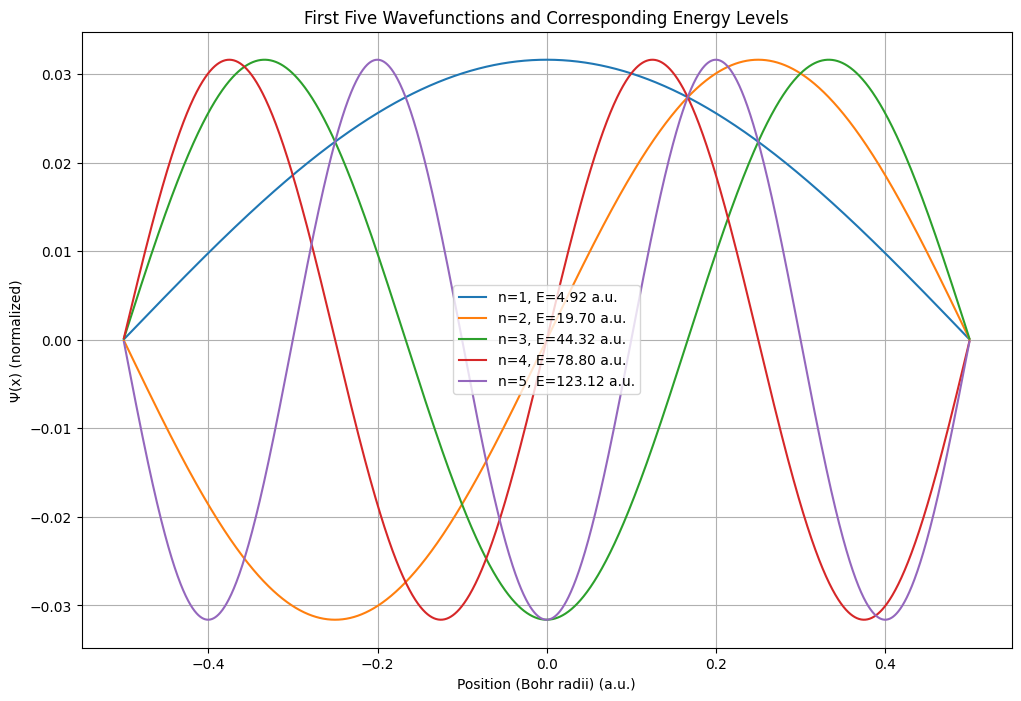

In [6]:
# Utilize matplotlib to plot the wavefunctions
import matplotlib.pyplot as plt

def plot_wavefunctions_and_energies(x, energies, wavefunctions, num_wavefunctions):
    """
    Plot the first few wavefunctions and their corresponding energy levels.
    
    parameters
    :x: Discretized spatial grid points.
    :energies: Array of sorted eigenvalues (energy levels).
    :wavefunctions: Array of sorted eigenfunctions (wavefunctions).
    :num_wavefunctions: Number of wavefunctions to plot.
    """
    plt.figure(figsize=(12, 8))
    
    # 3-e-Checking point 1) Plot the first five  wavefunctions
    for i in range(num_wavefunctions):
        plt.plot(x, wavefunctions[:, i], label=f'n={i + 1}, E={energies[i]:.2f} a.u.')
    
    # 3-e-Checking point 2) label the axes appropriately and include the wavefunctions in the correct units
    plt.xlabel('Position (Bohr radii) (a.u.)')
    plt.ylabel('Ψ(x) (normalized)')
    plt.title('First Five Wavefunctions and Corresponding Energy Levels')
    plt.grid(True)
    plt.legend()
    plt.show()

# Create the spatial grid
x = np.linspace(-L / 2, L / 2, N)

# Plot the first five wavefunctions and their corresponding energies
plot_wavefunctions_and_energies(x, first_seven_energies, eigenfunctions, num_wavefunctions=5)